# Importing Libraries

In [1]:
# For notebook plotting
%matplotlib inline

# Standard libraries
import os
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor, BaggingClassifier
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.metrics import cohen_kappa_score, make_scorer, confusion_matrix, roc_auc_score, roc_curve, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

# Loading in Data

In [2]:
breeds = pd.read_csv('Data/breed_labels.csv')
colors = pd.read_csv('Data/color_labels.csv')
states = pd.read_csv('Data/state_labels.csv')

train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test/test.csv')

train['dataset_type'] = 'train'
test['dataset_type'] = 'test'
all_data = pd.concat([train, test])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


# Initial EDA

In [3]:
breeds.tail()

,BreedID,Type,BreedName
302,302,2,Torbie
303,303,2,Tortoiseshell
304,304,2,Turkish Angora
305,305,2,Turkish Van
306,306,2,Tuxedo


In [4]:
breeds.shape

(307, 3)

In [5]:
breeds.describe().T

,count,mean,std,min,25%,50%,75%,max
BreedID,307.0,154.000000,88.767487,1.0,77.5,154.0,230.5,307.0
Type,307.0,1.214984,0.411482,1.0,1.0,1.0,1.0,2.0


In [6]:
breeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 3 columns):
BreedID      307 non-null int64
Type         307 non-null int64
BreedName    307 non-null object
dtypes: int64(2), object(1)
memory usage: 7.3+ KB


In [7]:
colors.head(10)

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream
5,6,Gray
6,7,White


In [8]:
colors.shape

(7, 2)

In [9]:
colors.describe().T

,count,mean,std,min,25%,50%,75%,max
ColorID,7.0,4.0,2.160247,1.0,2.5,4.0,5.5,7.0


In [10]:
states.head()

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan


In [11]:
states.shape

(15, 2)

In [12]:
states.describe().T

,count,mean,std,min,25%,50%,75%,max
StateID,15.0,41349.733333,29.001149,41324.0,41328.5,41336.0,41364.0,41415.0


In [13]:
train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,dataset_type
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,train
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,train
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,train
3,1,Miko,4,307,0,2,1,2,0,2,...,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,train
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,train


In [14]:
train.shape

(14993, 25)

In [15]:
train.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 25 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

> We have almost 15 thousands dogs and cats in the dataset;
>   
> Main dataset contains all important information about pets: age, breed, color, some characteristics and other things;
>    
> Desctiptions were analyzed using Google's Natural Language API providing sentiments and entities.
>    
> There are photos of some pets
>    
> Some meta-information was extracted from images
>    
> There are separate files with labels for breeds, colors and states;



In [17]:
test.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,dataset_type
0,1,Puppy,2,307,0,1,1,0,0,2,...,1,1,150,41326,4475f31553f0170229455e3c5645644f,0,"Puppy is calm for a young dog, but he becomes ...",378fcc4fc,3.0,test
1,2,London,24,266,0,1,2,7,0,2,...,1,1,0,41326,4475f31553f0170229455e3c5645644f,0,Urgently seeking adoption. Please contact for ...,73c10e136,1.0,test
2,2,Snowball,20,266,0,2,7,0,0,2,...,1,1,150,41326,4475f31553f0170229455e3c5645644f,0,Snowball... doesn't look so good (she is healt...,72000c4c5,1.0,test
3,2,Malibu,5,266,252,2,1,6,7,2,...,1,1,100,41326,4475f31553f0170229455e3c5645644f,0,"Malibu: Female, Local Mix, 4-5 months, vaccina...",e147a4b9f,1.0,test
4,1,Lala Girl,6,307,0,2,1,2,7,2,...,1,1,150,41326,4475f31553f0170229455e3c5645644f,0,LALA! That's my name. I'm a 6 month old girl d...,43fbba852,1.0,test


In [18]:
test.shape

(3948, 24)

In [19]:
test.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt
count,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000
mean,1.526089,11.564590,263.033435,57.359422,1.782675,2.232016,3.355623,2.061297,1.824468,1.466819,1.703647,1.506079,1.889311,1.043566,1.626393,27.346251,41351.019250,0.062817,3.809524
std,0.499382,18.568429,59.178121,112.086810,0.692633,1.736614,2.700144,3.041357,0.569772,0.613308,0.664200,0.682930,0.587995,0.218539,1.609914,88.416045,34.708648,0.391324,3.627959
min,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000
50%,2.000000,4.000000,266.000000,0.000000,2.000000,2.000000,3.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000
75%,2.000000,12.000000,307.000000,0.000000,2.000000,3.000000,6.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000
max,2.000000,180.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,2400.000000,41401.000000,9.000000,30.000000


# Graphing the Data

### Adoption Speed

### The values are determined in the following way:

> 0 - Pet was adopted on the same day as it was listed.
>
> 1 - Pet was adopted between 1 and 7 days (1st week) after being listed.
>
> 2 - Pet was adopted between 8 and 30 days (1st month) after being listed.
>
> 3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.
>
> 4 - No adoption after 100 days of being listed.
>
(There are no pets in this dataset that waited between 90 and 100 days).'

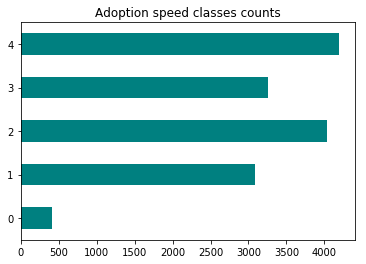

In [20]:
train['AdoptionSpeed'].value_counts().sort_index().plot('barh', color='teal');
plt.title('Adoption speed classes counts');

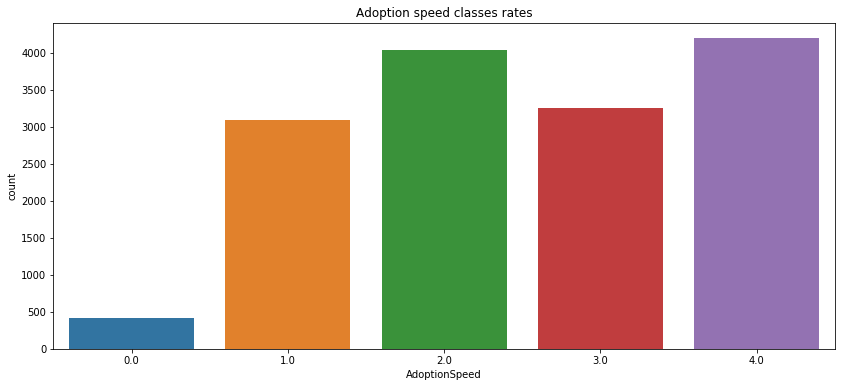

In [21]:
plt.figure(figsize=(14, 6));
g = sns.countplot(x='AdoptionSpeed', data=all_data.loc[all_data['dataset_type'] == 'train']);
plt.title('Adoption speed classes rates');
ax=g.axes

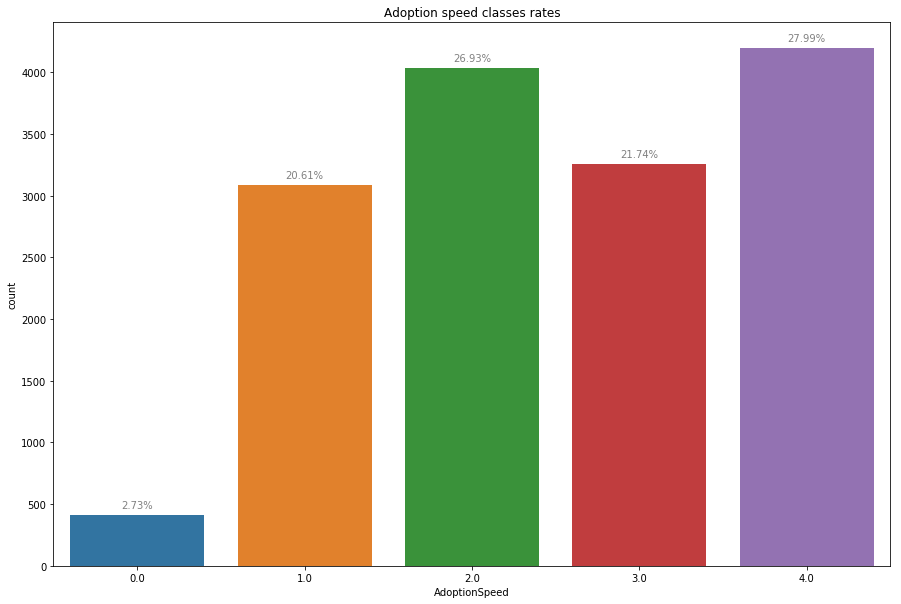

In [22]:
#Code from Kaggle example to add percentages to graph I used above
plt.figure(figsize=(15, 10));
g = sns.countplot(x='AdoptionSpeed', 
                  data=all_data.loc[all_data['dataset_type'] == 'train'])
plt.title('Adoption speed classes rates');
ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / train.shape[0]:.2f}%",
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', 
                 va='center', 
                 fontsize=10, 
                 color='gray', 
                 rotation=0, 
                 xytext=(0, 10),
                 textcoords='offset points') 

Text(0.5, 1.0, 'Adoption Speed (Target Variable)')

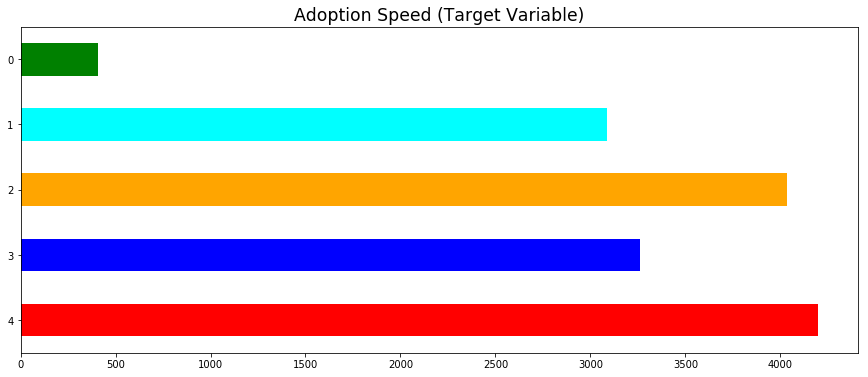

In [23]:
# Plot
train['AdoptionSpeed'].value_counts().sort_index(ascending = False).plot(kind = 'barh', 
                                                                            figsize = (15,6),
                                                                            color=['red', 'blue', 'orange', 'cyan', 'green'])
plt.title('Adoption Speed (Target Variable)', fontsize = 'xx-large')

## Age

Text(0.5, 0, 'Age in months')

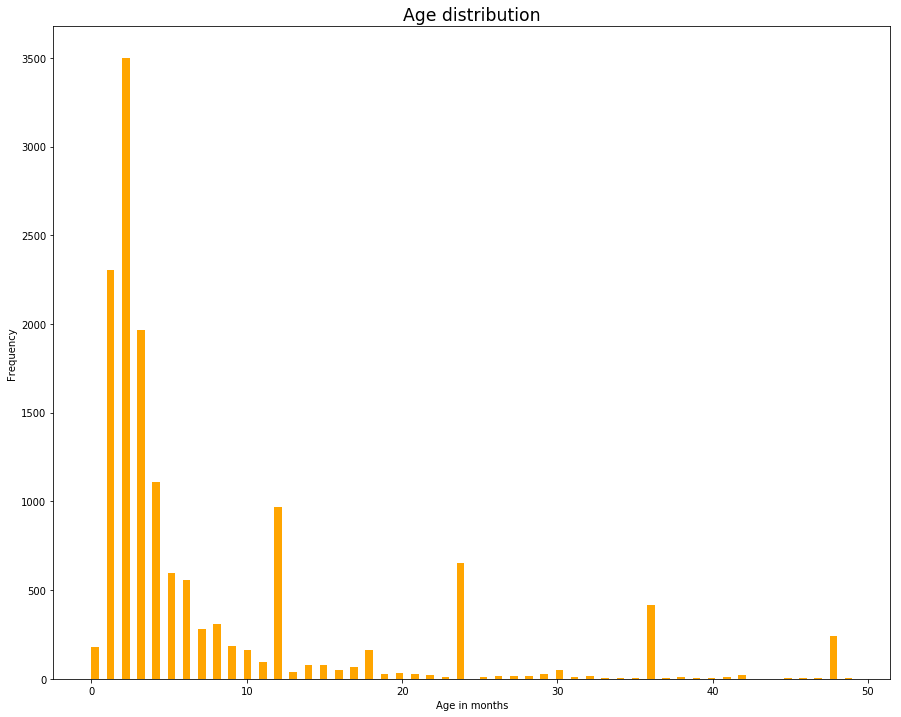

In [24]:
# Age distribution 
train['Age'][train['Age'] < 50].plot(kind = 'hist', 
                                           bins = 100, 
                                           figsize = (15,12), 
                                           title = 'Age distribution',
                                            color = 'orange')

plt.title('Age distribution', fontsize = 'xx-large')
plt.xlabel('Age in months')
# plt.figure(figsize=(15,12));

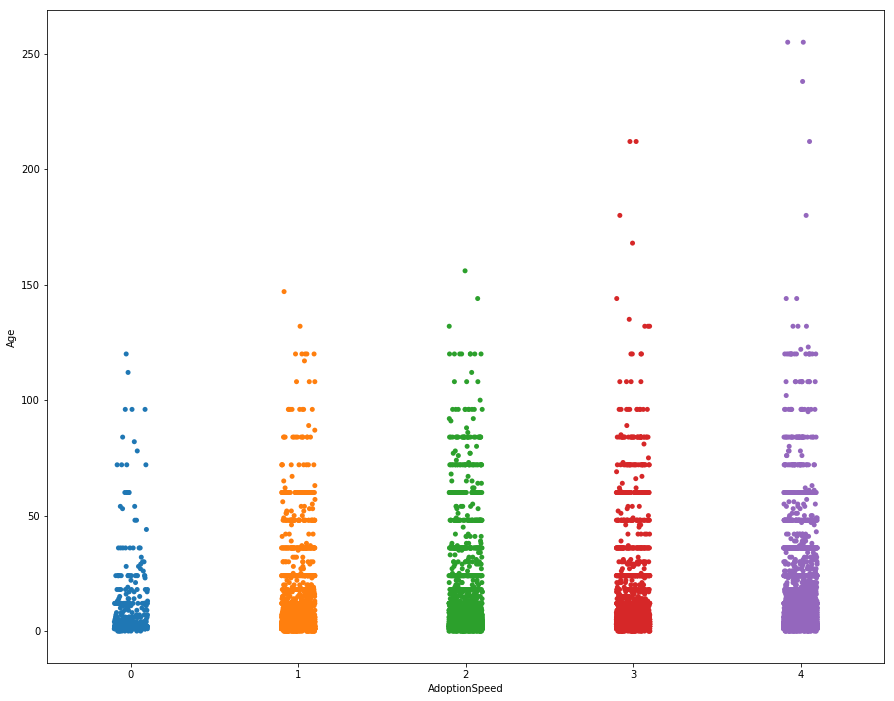

In [25]:
fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.stripplot(x="AdoptionSpeed", 
                   y="Age", 
                   data=train, 
                   ax=ax)
#                    title='Adoption Speed by Age'

## Gender

Text(0.5, 1.0, 'Gender distribution')

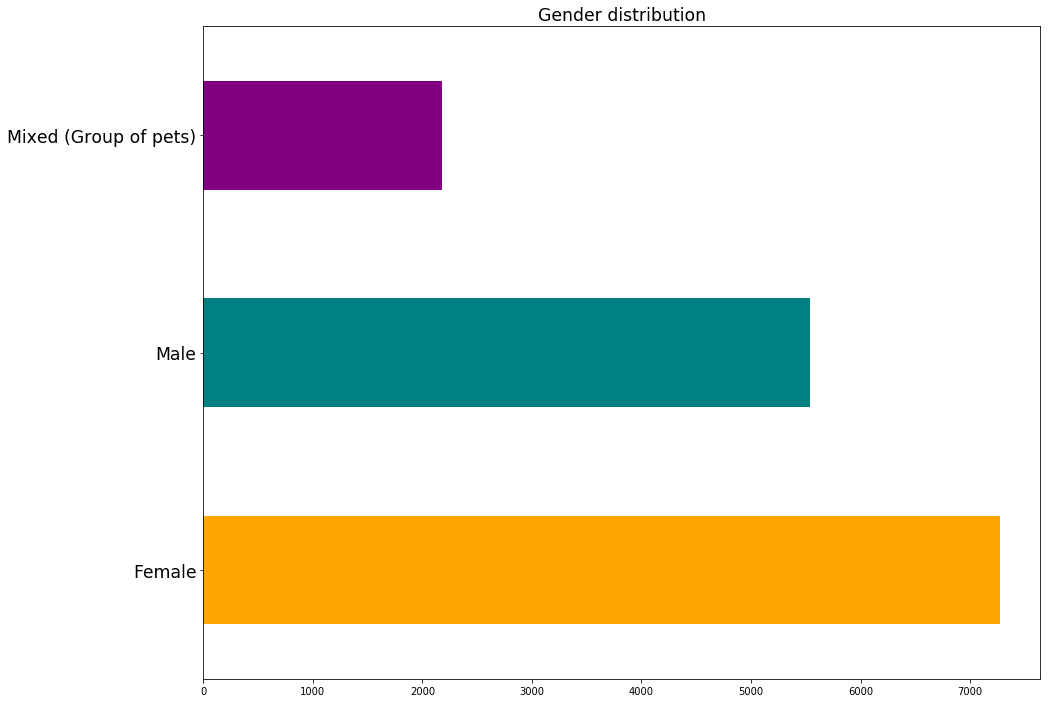

In [26]:
# Gender distribution
train['Gender'].value_counts().rename({1:'Male',
                                          2:'Female',
                                          3:'Mixed (Group of pets)'}).plot(kind = 'barh', 
                                                                           figsize = (15,12),
                                                                           color = ['orange', 'teal', 'purple'])
plt.yticks(fontsize = 'xx-large')
plt.title('Gender distribution', fontsize = 'xx-large')

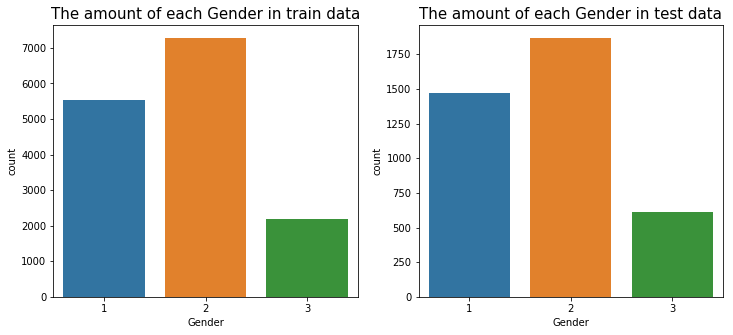

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x="Gender", data=train, ax=ax1)
sns.countplot(x="Gender", data=test, ax=ax2)
ax1.set_title("The amount of each Gender in train data", fontsize=15)
g = ax2.set_title("The amount of each Gender in test data", fontsize=15)

Text(0.5, 1.0, 'The amount of each Gender in train data')

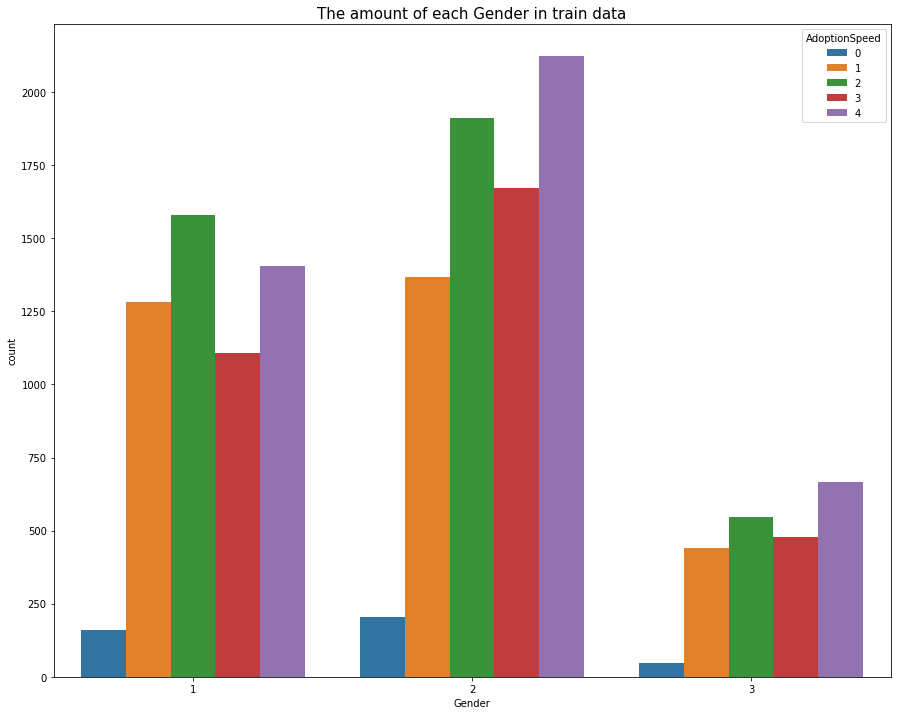

In [28]:
fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.countplot(x="Gender", data=train, ax=ax, hue="AdoptionSpeed")
ax.set_title("The amount of each Gender in train data", fontsize=15)

## Photos

Text(0.5, 0, 'Photos')

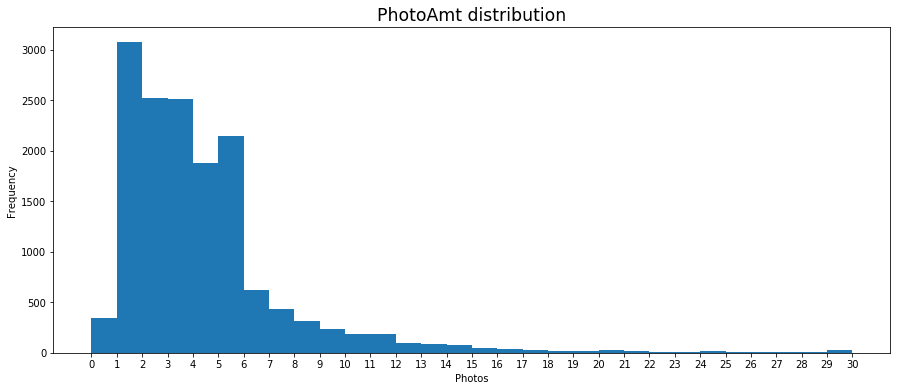

In [29]:
# Photo amount distribution
train['PhotoAmt'].plot(kind = 'hist', 
                          bins = 30, 
                          xticks = list(range(31)), 
                          figsize = (15,6))

plt.title('PhotoAmt distribution', fontsize='xx-large')
plt.xlabel('Photos')

## Color

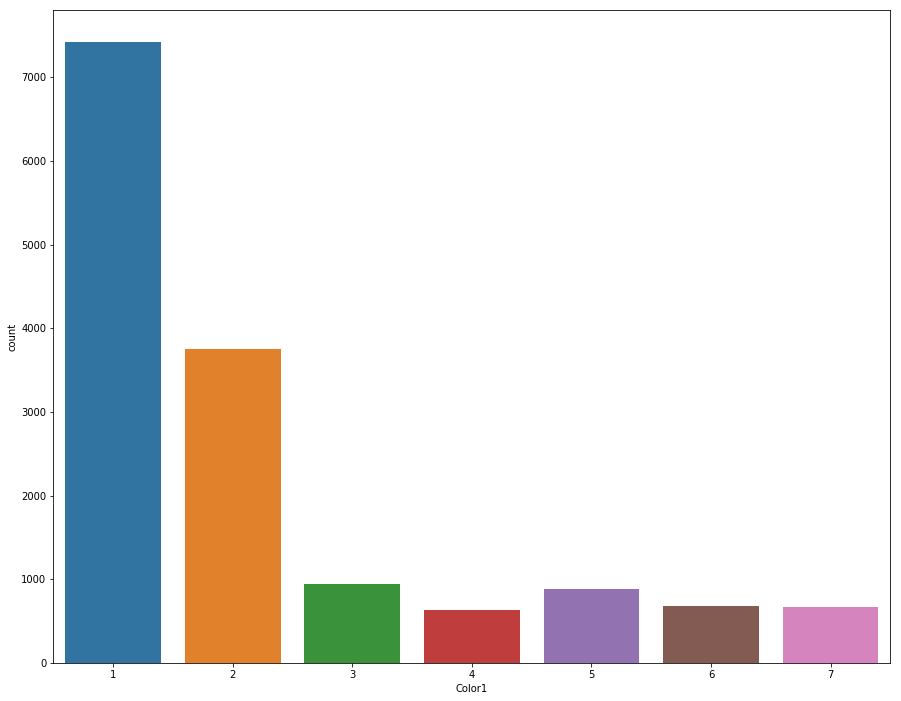

In [30]:
fig, ax2 = plt.subplots(1, figsize=(15, 12))
ax2 = sns.countplot(x="Color1", data=train, ax=ax2)

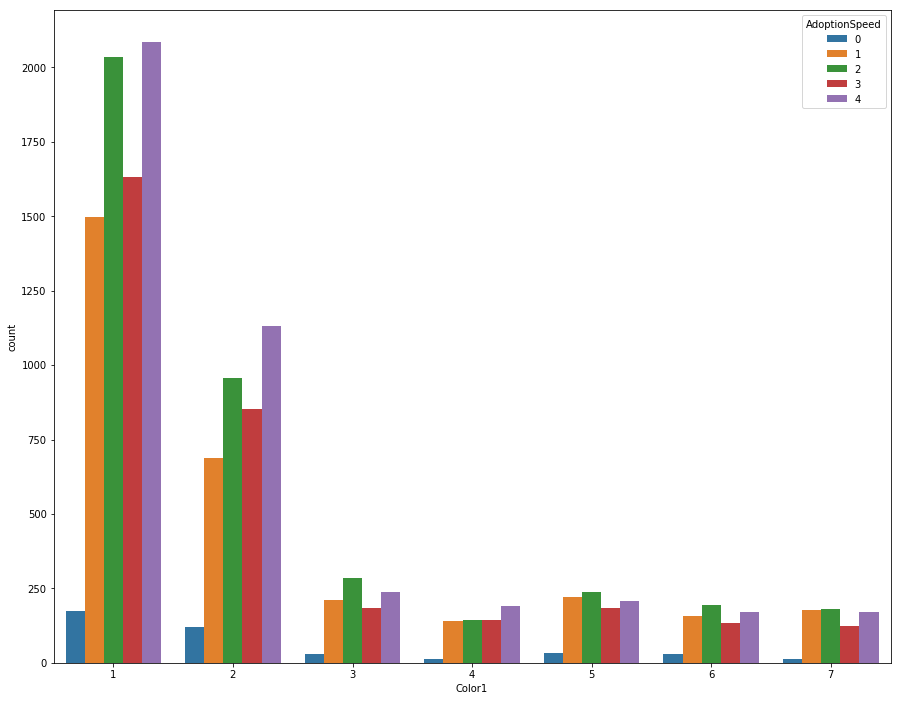

In [32]:
fig, ax1 = plt.subplots(1, figsize=(15, 12))
ax1 = sns.countplot(x="Color1", data=train, hue="AdoptionSpeed", ax=ax1)

## Checking Correlation

In [31]:
train.corr()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
Type,1.000000,-0.147162,0.057724,-0.043568,0.060843,0.097680,0.246333,0.201693,-0.171811,0.003036,0.102907,0.025508,0.006737,-0.006864,0.036423,-0.042134,0.124549,-0.005967,0.049368,-0.091240
Age,-0.147162,1.000000,-0.314346,-0.041010,-0.123423,0.090378,-0.039427,-0.053546,0.093673,0.153092,-0.136061,-0.053360,-0.189450,0.103215,-0.113076,0.089168,0.024523,-0.015969,-0.084778,0.100510
Breed1,0.057724,-0.314346,1.000000,-0.157053,0.071321,-0.035510,-0.007081,-0.000682,-0.010507,-0.108059,0.046518,0.013216,0.052698,-0.034893,0.090194,-0.189526,-0.026832,0.020626,0.043395,0.107834
Breed2,-0.043568,-0.041010,-0.157053,1.000000,0.056907,-0.020324,0.003015,0.035679,0.049879,0.106220,0.005638,-0.009817,-0.005989,-0.029285,0.038125,0.013508,-0.037993,0.001569,0.045953,-0.018642
Gender,0.060843,-0.123423,0.071321,0.056907,1.000000,-0.115351,0.026507,0.259309,-0.091819,-0.030404,0.078702,0.091431,0.040645,-0.045177,0.494489,-0.050491,0.002564,0.016816,0.098435,0.057622
Color1,0.097680,0.090378,-0.035510,-0.020324,-0.115351,1.000000,-0.113290,-0.282897,-0.029468,0.066967,-0.017475,-0.019318,-0.037050,0.024410,-0.116688,0.054180,0.024012,-0.006435,-0.041323,-0.044192
Color2,0.246333,-0.039427,-0.007081,0.003015,0.026507,-0.113290,1.000000,0.088742,-0.065155,-0.008764,0.026193,0.005812,0.007370,-0.004307,0.019876,-0.017308,0.026944,0.023983,0.059113,-0.038579
Color3,0.201693,-0.053546,-0.000682,0.035679,0.259309,-0.282897,0.088742,1.000000,-0.051730,0.013581,0.054053,0.048617,0.038899,-0.024782,0.272548,-0.019839,0.010554,0.019526,0.103662,-0.007014
MaturitySize,-0.171811,0.093673,-0.010507,0.049879,-0.091819,-0.029468,-0.065155,-0.051730,1.000000,0.095142,-0.087722,-0.067352,-0.066321,-0.012957,-0.042832,0.041144,-0.062584,0.017032,0.015593,0.045653
FurLength,0.003036,0.153092,-0.108059,0.106220,-0.030404,0.066967,-0.008764,0.013581,0.095142,1.000000,-0.006010,0.016463,0.032092,0.028096,-0.038388,0.159693,-0.029317,-0.014740,-0.031557,-0.091337


## Heatmap

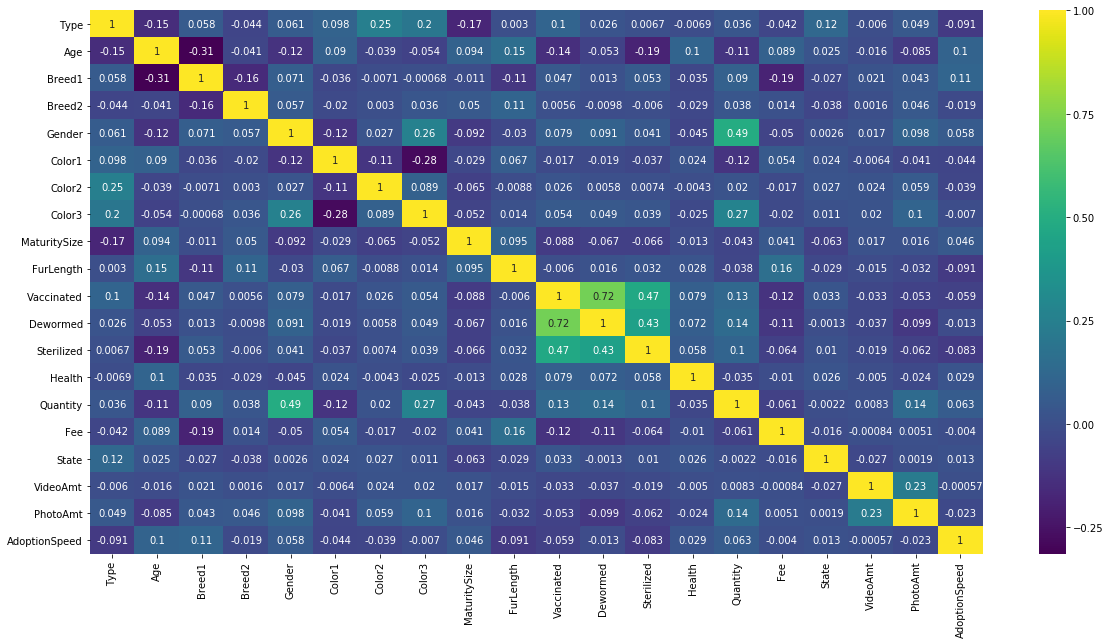

In [33]:
#Throwing our correlation into a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(train.corr(), annot=True, cmap='viridis');

## Pairplot for each correlation

### Setting features for pairplot and for future modeling

In [35]:
features = ['Type', 
            'Age', 
            'Breed1', 
            'Breed2', 
            'Gender', 
            'Color1', 
            'Color2', 
            'Color3', 
            'MaturitySize', 
            'FurLength', 
            'Vaccinated', 
            'Dewormed', 
            'Sterilized', 
            'Health', 
            'Quantity', 
            'Fee', 
            'State', 
            'VideoAmt', 
            'PhotoAmt']

features2 = ['Type', 
            'Age', 
            'Breed1', 
            'Breed2',  
            'Quantity', 
            'Fee', 
            'State', 
            'VideoAmt', 
            'PhotoAmt']

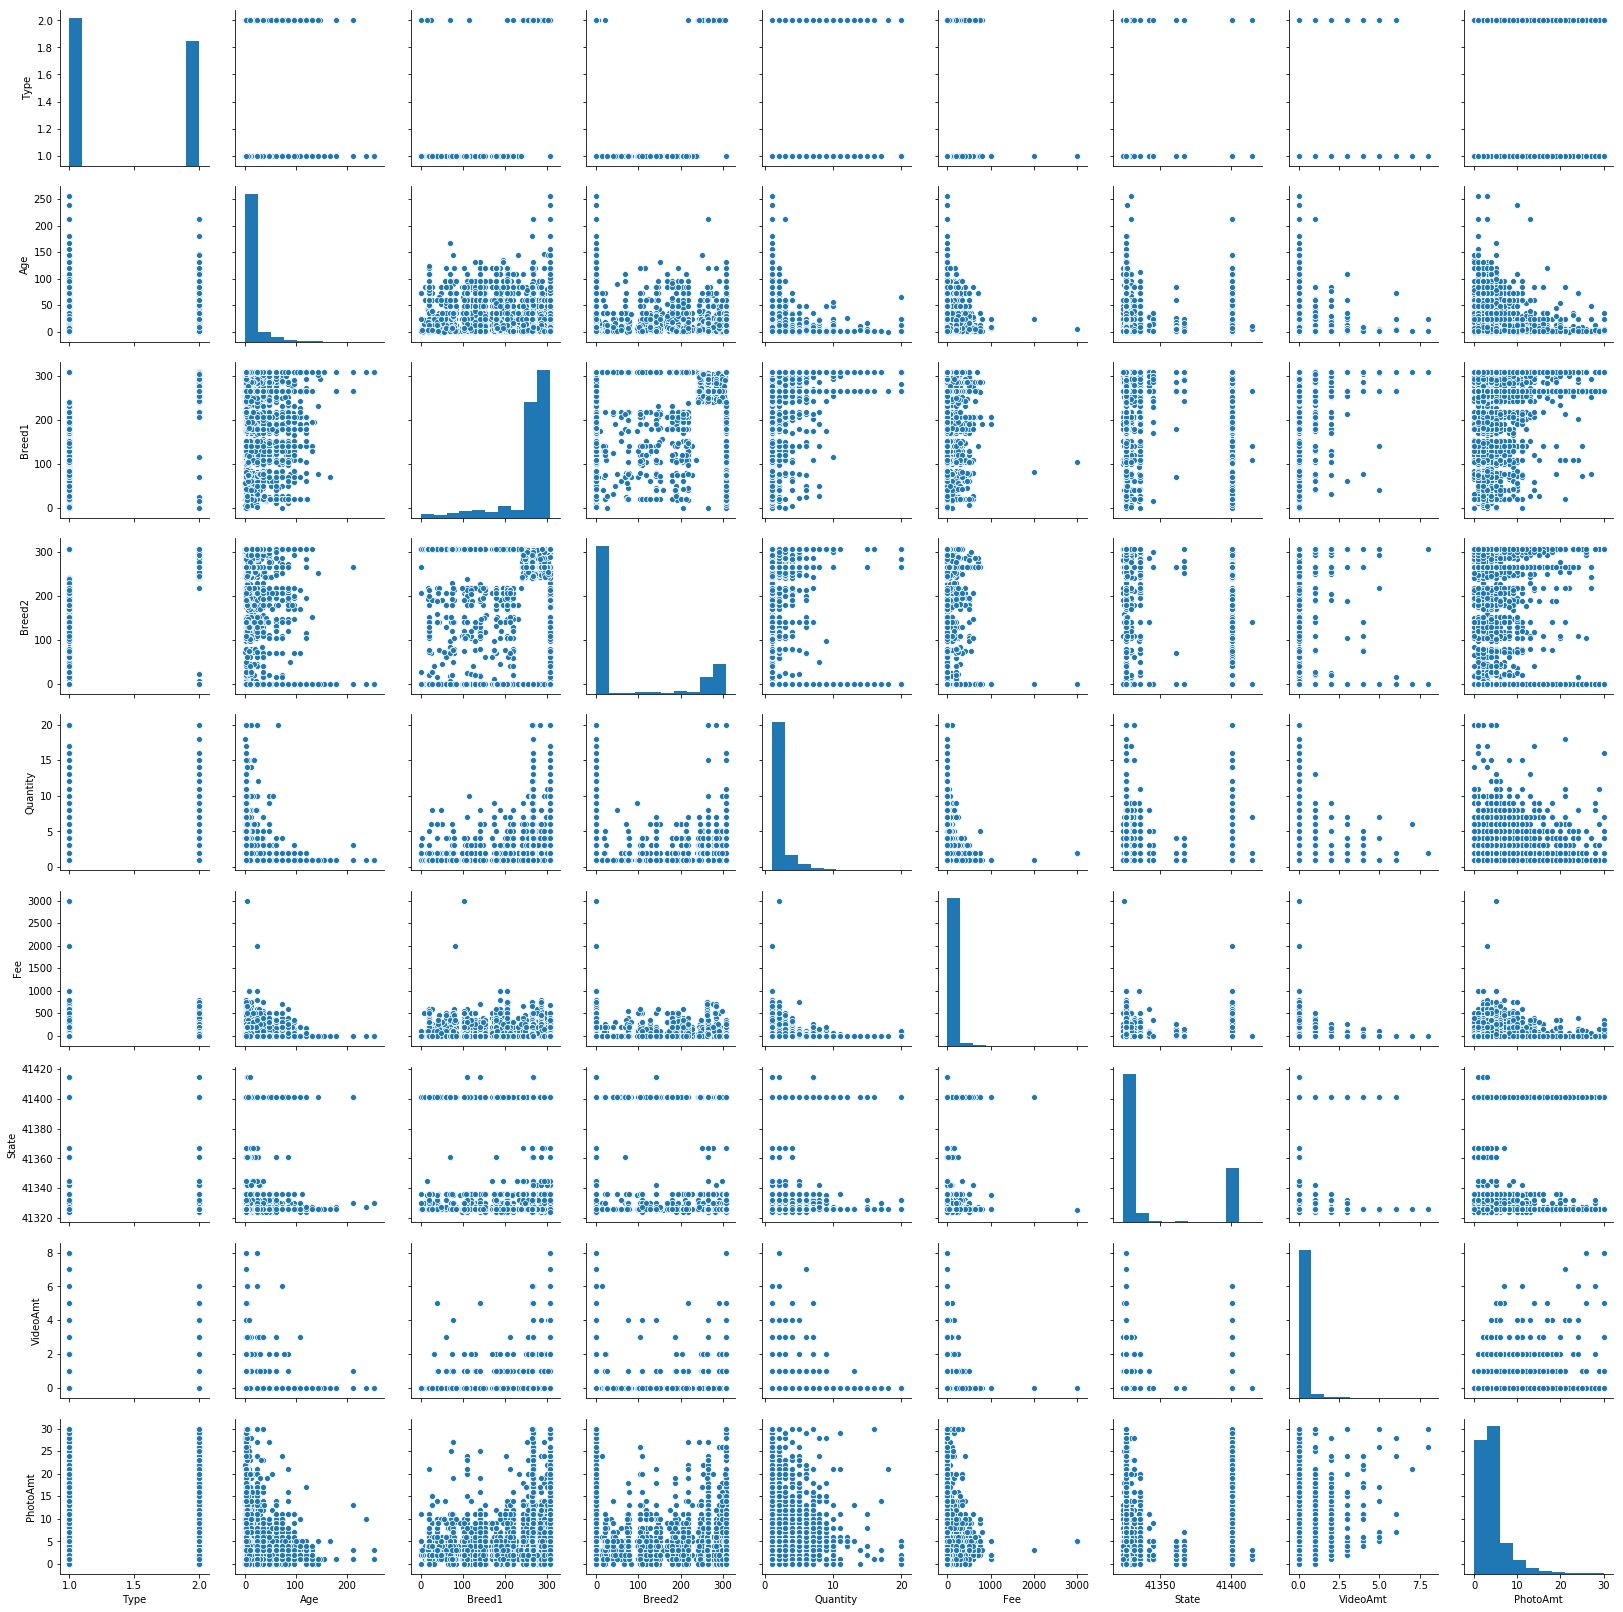

In [36]:
sns.pairplot(train[features2]);

### Class Distinctions

In [37]:
all_data['Type'] = all_data['Type'].apply(lambda x: 'Dog' if x == 1 else 'Cat')

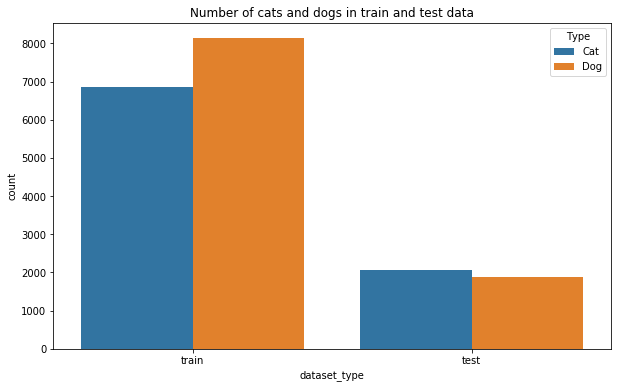

In [38]:
plt.figure(figsize=(10, 6));
sns.countplot(x='dataset_type', data=all_data, hue='Type');
plt.title('Number of cats and dogs in train and test data');

Text(0.5, 1.0, 'Type Distribution')

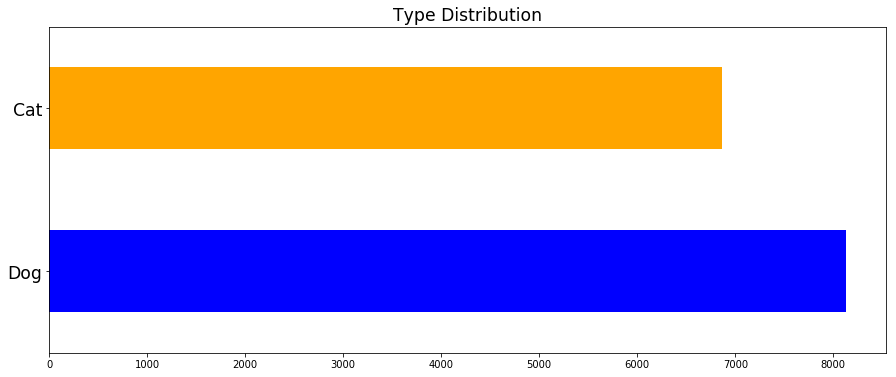

In [39]:
# Type distribution
train['Type'].value_counts().rename({1:'Dog',
                                        2:'Cat'}).plot(kind = 'barh',
                                                       figsize = (15,6),
                                                        color = ('blue', 'orange'))

plt.yticks(fontsize = 'xx-large')
plt.title('Type Distribution', fontsize = 'xx-large')

> There are more dogs than cats, however not by much so the uneven classes shouldn't be a huge issue.

# Word Cloud / Most common Names


In [40]:
from wordcloud import WordCloud

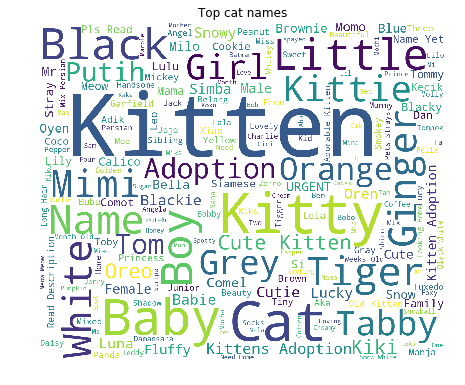

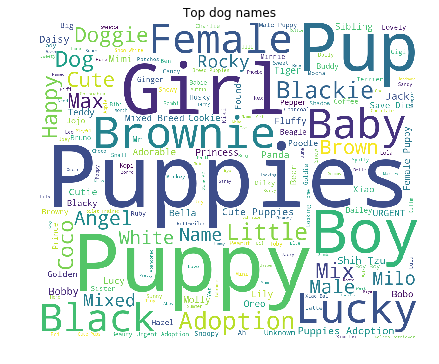

In [41]:
fig, ax = plt.subplots(figsize = (16, 12))
plt.subplot(1, 2, 1)
text_cat = ' '.join(all_data.loc[all_data['Type'] == 'Cat', 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_cat)
plt.imshow(wordcloud)
plt.title('Top cat names')
plt.axis("off")
plt.figure(figsize=(15,15))

plt.subplot(1, 2, 2)
text_dog = ' '.join(all_data.loc[all_data['Type'] == 'Dog', 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_dog)
plt.imshow(wordcloud)
plt.title('Top dog names')
plt.axis("off")

plt.show()

> Often we see normal pet names like "Brownie", "Ginger" and so on;
>
> Quite often people write simply who is there for adoption: "Kitten", "Puppies";
>
> Vety often the color of pet is written, sometimes gender;
>
> And it seems that sometimes names can be strange or there is some info written instead of the name;
>
> One more thing to notice is that some pets don't have names.

### Top 5 names and Adoption speed 

In [42]:
print('Most popular pet names and AdoptionSpeed')
for n in train['Name'].value_counts().index[:5]:
    print(n)
    print(train.loc[train['Name'] == n, 'AdoptionSpeed'].value_counts().sort_index())
    print('')

Most popular pet names and AdoptionSpeed
Baby
0     2
1    11
2    15
3    11
4    27
Name: AdoptionSpeed, dtype: int64

Lucky
0     5
1    14
2    16
3    12
4    17
Name: AdoptionSpeed, dtype: int64

Brownie
0     1
1    11
2    14
3    12
4    16
Name: AdoptionSpeed, dtype: int64

No Name
0     3
1    14
2    11
3     6
4    20
Name: AdoptionSpeed, dtype: int64

Mimi
0     3
1    12
2    13
3     7
4    17
Name: AdoptionSpeed, dtype: int64



### Clean up DataFrames

In [49]:
train_df = train.drop(columns = ['Name', 'RescuerID', 'Description', 'PetID'])
test_df = test.drop(columns = ['Name', 'RescuerID', 'Description', 'PetID'])

In [50]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Type,14993.0,1.457614,0.498217,1.0,1.0,1.0,2.0,2.0
Age,14993.0,10.452078,18.155790,0.0,2.0,3.0,12.0,255.0
Breed1,14993.0,265.272594,60.056818,0.0,265.0,266.0,307.0,307.0
Breed2,14993.0,74.009738,123.011575,0.0,0.0,0.0,179.0,307.0
Gender,14993.0,1.776162,0.681592,1.0,1.0,2.0,2.0,3.0
Color1,14993.0,2.234176,1.745225,1.0,1.0,2.0,3.0,7.0
Color2,14993.0,3.222837,2.742562,0.0,0.0,2.0,6.0,7.0
Color3,14993.0,1.882012,2.984086,0.0,0.0,0.0,5.0,7.0
MaturitySize,14993.0,1.862002,0.547959,1.0,2.0,2.0,2.0,4.0
FurLength,14993.0,1.467485,0.599070,1.0,1.0,1.0,2.0,3.0


### Train, test, split

In [51]:
X = train_df[features]

y = train_df['AdoptionSpeed']

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.25, random_state=42)

In [52]:
train_df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


### Instantiating and fitting models. Then creating predictions

In [53]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree_preds = tree.predict(X_test)


knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_preds = knn.predict(X_test)


lg = LogisticRegression()
lg.fit(X_train,y_train)
lg_preds = lg.predict(X_test)


bag = BaggingClassifier()
bag.fit(X_train,y_train)
bag_preds = bag.predict(X_test)


rfr = RandomForestClassifier()
rfr.fit(X_train,y_train)
rfr_preds = rfr.predict(X_test)



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### Checking to see if predcitions were created

In [54]:
rfr_preds

array([4, 1, 4, ..., 1, 2, 2])

### Checking training scores and creating a confusion matrix for the predictions on each of the models

In [53]:
print(f' KNN Training score is {knn.score(X_train,y_train)}')
print(f' KNN Testing score is {knn.score(X_test, y_test)}')
confusion_matrix(y_test,knn_preds)

 KNN Training score is 0.5426894343649946
 KNN Testing score is 0.3280874899973326


array([[  7,  48,  32,  11,  16],
       [ 20, 291, 280, 106,  76],
       [ 21, 320, 342, 155, 156],
       [ 10, 193, 276, 195, 139],
       [ 17, 218, 246, 179, 395]])

In [54]:
print(f' Logistic Regression training score is {lg.score(X_train,y_train)}')
print(f' Logistic Regression testing score is {lg.score(X_test, y_test)}')
confusion_matrix(y_test,lg_preds)

 Logistic Regression training score is 0.32355033795802207
 Logistic Regression testing score is 0.3222192584689251


array([[  0,   9,  48,   0,  57],
       [  0,  63, 384,   1, 325],
       [  0,  58, 419,   2, 515],
       [  0,  71, 305,   1, 436],
       [  0,  32, 297,   1, 725]])

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt
0,0.000235,-0.001474,-0.003123,0.001246,-0.000125,0.000262,0.000595,0.000457,-0.000143,0.000264,0.000095,0.000149,0.000081,0.000022,-0.000289,-0.000762,-0.000070,-0.000001,-0.000852
1,0.001408,-0.016332,-0.004680,-0.000692,-0.000797,0.002363,0.001420,0.000329,-0.000842,0.001633,0.001143,0.000701,0.001242,-0.000101,-0.001564,-0.000237,0.000002,-0.000298,-0.004024
2,0.000063,-0.008318,-0.000631,-0.000220,-0.000434,0.000292,0.000433,-0.000325,0.000037,0.000114,0.000170,-0.000230,0.000140,-0.000088,-0.000493,0.000291,-0.000018,0.000095,0.002191
3,-0.000374,-0.001520,-0.000622,0.000494,0.000188,-0.000303,0.000032,-0.000607,0.000215,-0.000236,-0.000380,-0.000456,-0.000386,-0.000003,-0.000304,-0.000551,-0.000028,0.000104,0.005462
4,-0.000333,0.020088,0.006775,0.000079,0.000584,-0.001080,-0.001451,0.000710,0.000169,-0.000726,-0.000282,0.000332,-0.000295,0.000117,0.001794,0.000722,-0.000072,-0.000075,-0.006593


In [105]:
X

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,0,1.0
1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,0,2.0
2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,0,7.0
3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,0,8.0
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,0,3.0
5,2,3,266,0,2,5,6,0,2,1,2,2,2,1,1,0,41326,0,2.0
6,2,12,264,264,1,1,0,0,2,3,2,2,3,1,1,300,41326,0,3.0
7,1,0,307,0,2,1,2,7,2,1,2,2,2,1,6,0,41326,0,9.0
8,2,2,265,0,2,6,0,0,2,2,2,2,2,1,1,0,41326,0,6.0
9,2,12,265,0,2,1,7,0,2,2,3,3,3,1,1,0,41326,0,2.0


In [103]:
lg.intercept_

array([-5.76605871e-08, -1.60844269e-07,  1.03033541e-07,  4.06351204e-07,
       -5.65020891e-07])

In [55]:
print(f' Decision Tree training score is {tree.score(X_train,y_train)}')
print(f' Decision Tree testing score is {tree.score(X_test, y_test)}')
confusion_matrix(y_test,tree_preds)

 Decision Tree training score is 0.9853255069370331
 Decision Tree testing score is 0.3310216057615364


array([[ 11,  32,  24,  20,  27],
       [ 28, 233, 209, 161, 142],
       [ 31, 239, 309, 206, 209],
       [ 27, 157, 189, 249, 191],
       [ 22, 149, 230, 215, 439]])

In [56]:
print(f' Bagging training score is {bag.score(X_train,y_train)}')
print(f' Bagging testing score is {bag.score(X_test, y_test)}')
confusion_matrix(y_test,bag_preds)

 Bagging training score is 0.9671824973319103
 Bagging testing score is 0.3755668178180848


array([[  8,  32,  32,  17,  25],
       [ 14, 278, 256, 103, 122],
       [  7, 257, 368, 163, 199],
       [  8, 168, 218, 218, 201],
       [  6, 134, 236, 143, 536]])

In [57]:
print(f' Random Forest training score is {rfr.score(X_train,y_train)}')
print(f' Random Forest test score is {rfr.score(X_test, y_test)}')
confusion_matrix(y_test,rfr_preds)

 Random Forest training score is 0.971362504446816
 Random Forest test score is 0.37156575086689786


array([[  8,  30,  43,  12,  21],
       [  6, 289, 243, 122, 113],
       [  5, 267, 346, 169, 207],
       [ 10, 176, 199, 232, 196],
       [  6, 147, 225, 159, 518]])

In [91]:
target_names= ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']

### Graphing confusion matrix for each model

In [63]:
#### Random Forest

In [67]:
from mlxtend.evaluate import confusion_matrix
y_rfr =    y_test
y_pred_rfr = rfr_preds

cm_rfr = confusion_matrix(y_target=y_rfr, 
                      y_predicted=y_pred_rfr, 
                      binary=False)
cm_rfr

array([[  8,  30,  43,  12,  21],
       [  6, 289, 243, 122, 113],
       [  5, 267, 346, 169, 207],
       [ 10, 176, 199, 232, 196],
       [  6, 147, 225, 159, 518]])

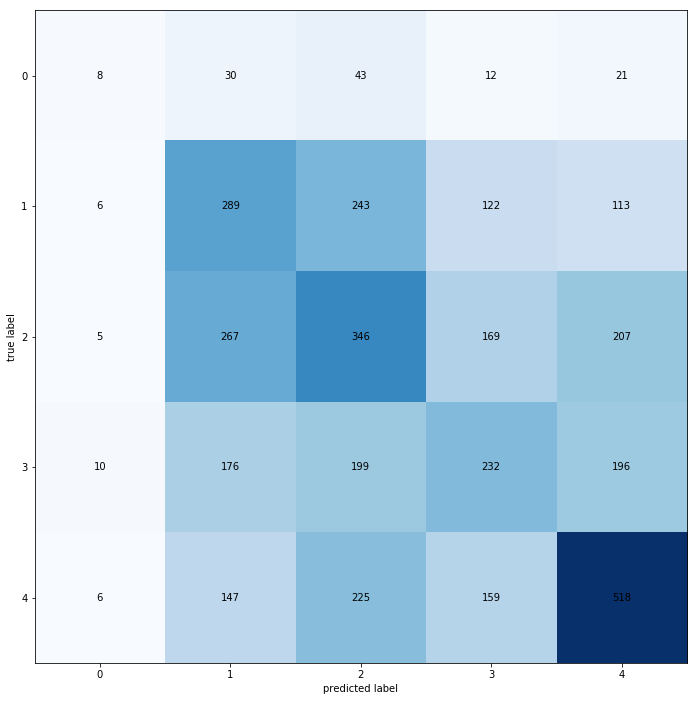

In [107]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm_rfr, figsize=(15,12))
plt.show()

#### Getting metrics from model predictions

In [92]:
print(classification_report(y_test, rfr_preds, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.23      0.07      0.11       114
     Class 1       0.32      0.37      0.34       773
     Class 2       0.33      0.35      0.34       994
     Class 3       0.33      0.29      0.31       813
     Class 4       0.49      0.49      0.49      1055

   micro avg       0.37      0.37      0.37      3749
   macro avg       0.34      0.31      0.32      3749
weighted avg       0.37      0.37      0.37      3749



### Decision Tree

In [70]:
y_tree =    y_test
y_pred_tree = rfr_preds

cm_tree = confusion_matrix(y_target=y_tree, 
                      y_predicted=y_pred_tree, 
                      binary=False)
cm_tree

array([[  8,  30,  43,  12,  21],
       [  6, 289, 243, 122, 113],
       [  5, 267, 346, 169, 207],
       [ 10, 176, 199, 232, 196],
       [  6, 147, 225, 159, 518]])

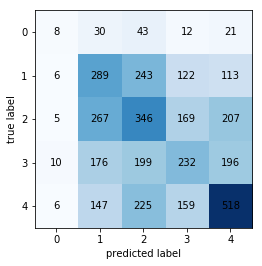

In [74]:
fig, ax = plot_confusion_matrix(conf_mat=cm_tree)
plt.show()

#### Getting metrics from model predictions

In [94]:
print(classification_report(y_test, tree_preds, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.09      0.10      0.09       114
     Class 1       0.29      0.30      0.29       773
     Class 2       0.32      0.31      0.32       994
     Class 3       0.29      0.31      0.30       813
     Class 4       0.44      0.42      0.43      1055

   micro avg       0.33      0.33      0.33      3749
   macro avg       0.29      0.29      0.29      3749
weighted avg       0.33      0.33      0.33      3749



### Bagging

In [71]:
y_bag =    y_test
y_pred_bag = rfr_preds

cm_bag = confusion_matrix(y_target=y_bag, 
                      y_predicted=y_pred_bag, 
                      binary=False)
cm_bag

array([[  8,  30,  43,  12,  21],
       [  6, 289, 243, 122, 113],
       [  5, 267, 346, 169, 207],
       [ 10, 176, 199, 232, 196],
       [  6, 147, 225, 159, 518]])

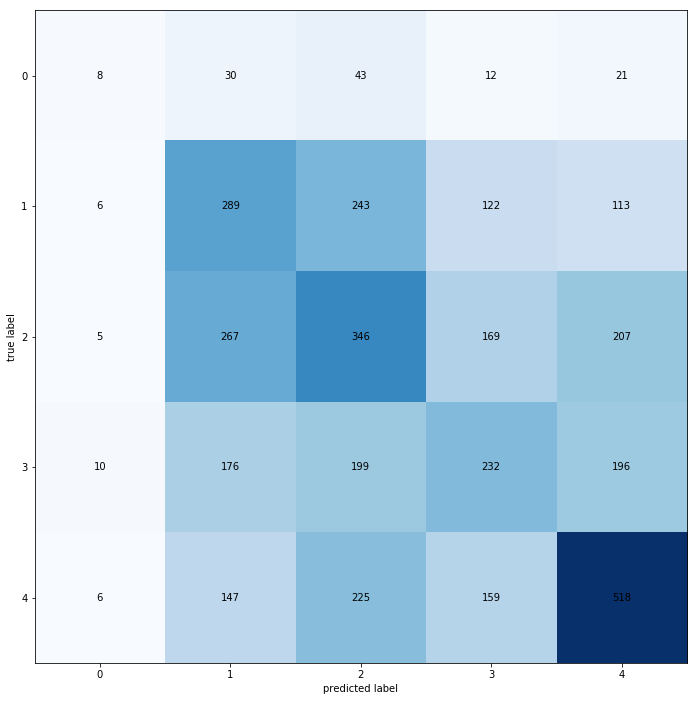

In [108]:
fig, ax = plot_confusion_matrix(conf_mat=cm_bag, figsize=(15,12))
plt.show()

#### Getting metrics from model predictions

In [95]:
print(classification_report(y_test, bag_preds, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.19      0.07      0.10       114
     Class 1       0.32      0.36      0.34       773
     Class 2       0.33      0.37      0.35       994
     Class 3       0.34      0.27      0.30       813
     Class 4       0.49      0.51      0.50      1055

   micro avg       0.38      0.38      0.38      3749
   macro avg       0.33      0.32      0.32      3749
weighted avg       0.37      0.38      0.37      3749



### Logistic Regression

In [72]:
y_lg =    y_test
y_pred_lg = rfr_preds

cm_lg = confusion_matrix(y_target=y_lg, 
                      y_predicted=y_pred_lg, 
                      binary=False)
cm_lg

array([[  8,  30,  43,  12,  21],
       [  6, 289, 243, 122, 113],
       [  5, 267, 346, 169, 207],
       [ 10, 176, 199, 232, 196],
       [  6, 147, 225, 159, 518]])

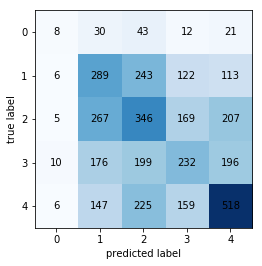

In [76]:
fig, ax = plot_confusion_matrix(conf_mat=cm_lg)
plt.show()

#### Getting metrics from model predictions

In [96]:
print(classification_report(y_test, lg_preds, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       114
     Class 1       0.27      0.08      0.13       773
     Class 2       0.29      0.42      0.34       994
     Class 3       0.20      0.00      0.00       813
     Class 4       0.35      0.69      0.47      1055

   micro avg       0.32      0.32      0.32      3749
   macro avg       0.22      0.24      0.19      3749
weighted avg       0.27      0.32      0.25      3749



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### KNN

In [73]:
y_knn =    y_test
y_pred_knn = rfr_preds

cm_knn = confusion_matrix(y_target=y_knn, 
                      y_predicted=y_pred_knn, 
                      binary=False)
cm_knn

array([[  8,  30,  43,  12,  21],
       [  6, 289, 243, 122, 113],
       [  5, 267, 346, 169, 207],
       [ 10, 176, 199, 232, 196],
       [  6, 147, 225, 159, 518]])

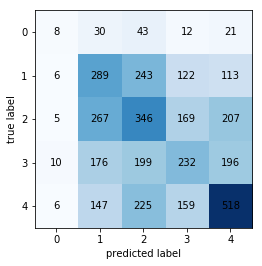

In [77]:
fig, ax = plot_confusion_matrix(conf_mat=cm_knn)
plt.show()

#### Getting metrics from model predictions

In [97]:
print(classification_report(y_test, knn_preds, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.09      0.06      0.07       114
     Class 1       0.27      0.38      0.32       773
     Class 2       0.29      0.34      0.32       994
     Class 3       0.30      0.24      0.27       813
     Class 4       0.51      0.37      0.43      1055

   micro avg       0.33      0.33      0.33      3749
   macro avg       0.29      0.28      0.28      3749
weighted avg       0.34      0.33      0.33      3749



#### Checking coefficients on Logistic regression to see if we can find any impacters

In [57]:
lg_df = pd.DataFrame(lg.coef_, index= lg.classes_, columns=X.columns)

In [62]:
lg_df

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt
0,0.000235,-0.001474,-0.003123,0.001246,-0.000125,0.000262,0.000595,0.000457,-0.000143,0.000264,0.000095,0.000149,0.000081,0.000022,-0.000289,-0.000762,-0.000070,-0.000001,-0.000852
1,0.001408,-0.016332,-0.004680,-0.000692,-0.000797,0.002363,0.001420,0.000329,-0.000842,0.001633,0.001143,0.000701,0.001242,-0.000101,-0.001564,-0.000237,0.000002,-0.000298,-0.004024
2,0.000063,-0.008318,-0.000631,-0.000220,-0.000434,0.000292,0.000433,-0.000325,0.000037,0.000114,0.000170,-0.000230,0.000140,-0.000088,-0.000493,0.000291,-0.000018,0.000095,0.002191
3,-0.000374,-0.001520,-0.000622,0.000494,0.000188,-0.000303,0.000032,-0.000607,0.000215,-0.000236,-0.000380,-0.000456,-0.000386,-0.000003,-0.000304,-0.000551,-0.000028,0.000104,0.005462
4,-0.000333,0.020088,0.006775,0.000079,0.000584,-0.001080,-0.001451,0.000710,0.000169,-0.000726,-0.000282,0.000332,-0.000295,0.000117,0.001794,0.000722,-0.000072,-0.000075,-0.006593
